# Principal Component Analysis (PCA)

PCA is a unsupervised learning algorithm for dimensionality-reduction that reduces the number of variables (columns) of a dataset, while preserving the maximum possible amount of information.

Some terms you should understand before going through PCA:

- **Eigen Vector:** In linear algebra, an eigenvector of a square matrix is a non-zero vector that does not change its direction when the matrix is applied to it. In other words, if A is a matrix and x is a non-zero vector, then x is an eigenvector of A if the following equation is satisfied:\
<p style="text-align: center;">Ax = λx</p>

- **Eigen Value:** In the above equation **λ** is a scalar value known as the eigenvalue. Eigenvectors and eigenvalues play an important role in the study of linear transformations, which can be used to model a wide variety of real-world situations. For example, eigenvectors can be used to represent the directions in which a matrix stretches or compresses a space, and eigenvalues can be used to determine the amount of stretching or compression that occurs in each direction.

- **Variance:** In statistics, the variance of a population or a sample is a measure of the spread or dispersion of the data. It is defined as the average of the squared differences between each data point and the mean of the data. For a population with mean μ and size N, the variance is calculated as follows:
<p style="text-align: center;">σ^2 = ∑ (x_i - μ)^2 / N</p>

### PCA Steps:

1. **Data Standardization:** PCA is quite sensitive to variance. For equal contribution of each variables to the analysis, we need to standardize the range of continuous initial variables.

2. **Covariance Matrix Computation:** Covariance matrix is a square matrix used to analyze the correlation between variables. In other words if the variables are directly (positive sign) or inversely (negative sign) proportional to each other and by what amount.

3. **Eigenvector and Eigenvalue for Covariance Matrix:** Calculation of Eigenvectors and thus Eigenvalues for a covariance matrix aids in identifying the principal component. Principal Components are new non-correlated variables constructed by the combinations of intial variables. Eignevectors suggest the direction of axes with maximum variance while Eigenvalues give the amount of variance in each Principal Component. To calculate principal components we first sort Eigenvectors according to the decreasing value of their corresponding Eignevalues.

4. **Computing Feature Vectors:** We select only a few components with higher Eigenvalues and for a matrix consisting Eigenvectors of the selected components called Feature Vectors.

5. **Projecting data to Principal Components:** The original data are projected to the the axes defined by principal components. This is the final data obtained. This final data is obtained as follows: 
<p style="text-align: center;">Final Data = Transpose(Feature Vector) * Transpose(Standardized Data)</p>

In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer 

In [2]:
df = pd.read_csv('./../data/reviews.csv')

### Preprocessing

In [3]:
# nltk.download('stopwords')
stopwords = stopwords.words('english')
stemmer = PorterStemmer()
stopwords = [stemmer.stem(word) for word in stopwords]

In [4]:
def clean_review(review):
    review = review.lower()
    review = review.translate(str.maketrans(string.punctuation,len(string.punctuation)*' '))
    review = ' '.join([stemmer.stem(word) for word in review.split()])
    return review
    
df['cleaned_reviews'] = df['Review'].apply(lambda x: clean_review(x))

### Constructing Feature Vectors using TF-IDF

In [5]:
vectorizer = TfidfVectorizer(max_features=5000)
reviews = list(df['cleaned_reviews'])
labels = df['Label']

vectors = vectorizer.fit_transform(reviews)
arrays = vectors.toarray()

### Computing PCA

In [6]:
NUM_COMPONENTS = 2000
pca = PCA(NUM_COMPONENTS)
pca.fit_transform(arrays)

array([[ 2.32349282e-01, -1.15465996e-01,  2.55788084e-01, ...,
         6.05692291e-04, -2.76960404e-03, -3.24994358e-05],
       [ 8.00039900e-02, -6.06340418e-02, -1.48113625e-01, ...,
         1.35543356e-03, -1.47846915e-02,  8.34825256e-02],
       [ 7.02728776e-02, -5.44503322e-02, -1.02131380e-01, ...,
         3.38950978e-03, -2.23855101e-03,  5.11471484e-04],
       ...,
       [-1.24811111e-01,  2.86850437e-02, -2.85516680e-02, ...,
         1.09595816e-03, -1.43169560e-03, -3.18133001e-03],
       [ 1.21645664e-01, -1.44365677e-02, -5.15715452e-02, ...,
         4.25197352e-02,  1.31249117e-02, -3.00813602e-03],
       [ 6.20193933e-02,  2.35426542e-02,  1.79998691e-03, ...,
        -7.07959762e-03,  7.65810376e-03,  1.37213211e-02]])

In [7]:
variance_explained = np.cumsum(pca.explained_variance_)

Text(0, 0.5, 'Cumulative explained variance')

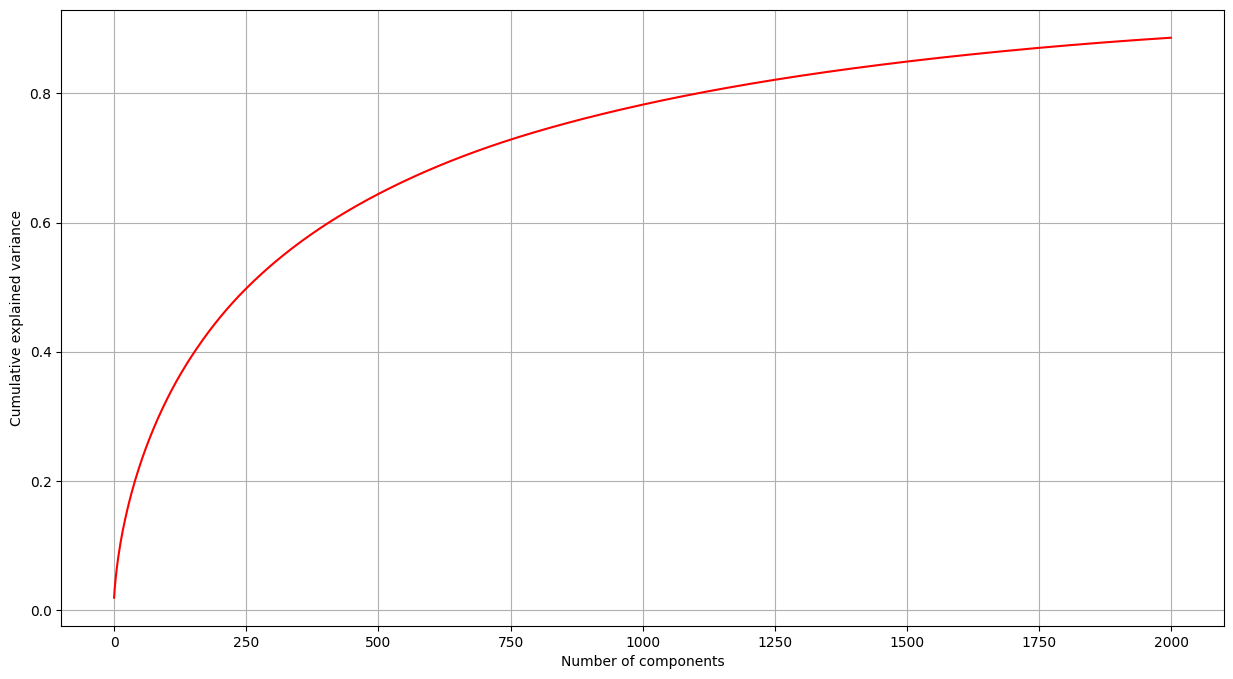

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(range(NUM_COMPONENTS),variance_explained, color='r')
ax.grid(True)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

It takes around 500 components to explain 65% of variance and nearly 1100 components for 80% of the variance explanation.

### Computing PCA for 3 components only

In [9]:
NUM_COMPONENTS = 3
pca = PCA(NUM_COMPONENTS)
reduced = pca.fit_transform(arrays)

In [10]:
labels = df['Label']
df = pd.DataFrame(reduced,columns=['A','B','C'])
df['Label'] = labels

In [11]:
df.columns

Index(['A', 'B', 'C', 'Label'], dtype='object')

Text(0.05, 0.95, 'PCA for n=3 components')

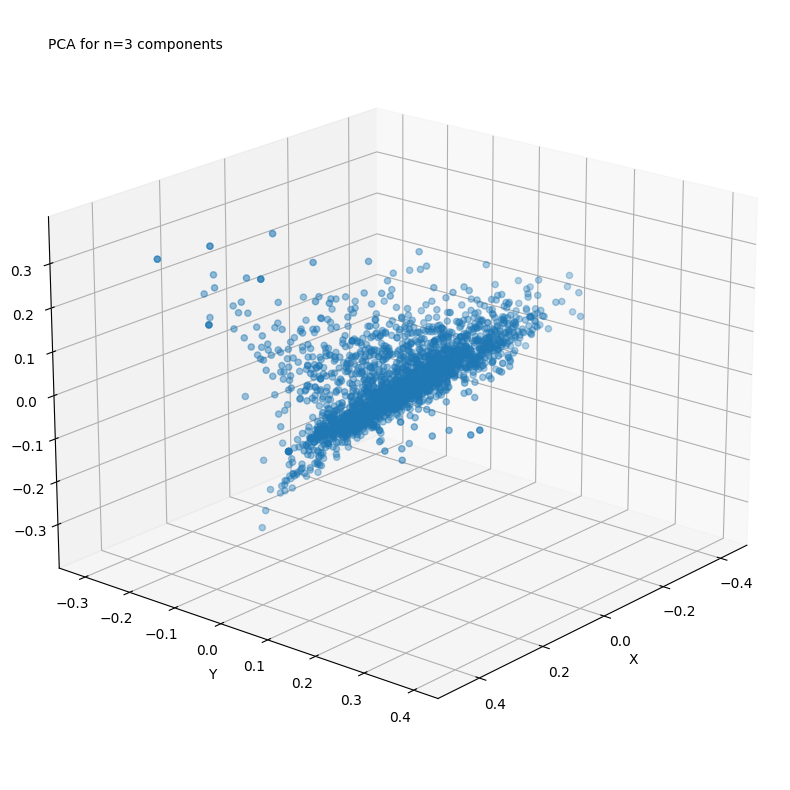

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 40)
ax.scatter(df[df['Label']==1]['A'], df[df['Label']==1]['B'], df[df['Label']==1]['C'], marker = 'o')
ax.scatter(df[df['Label']==0]['A'], df[df['Label']==0]['B'], df[df['Label']==0]['C'], marker = '^')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.text2D(0.05, 0.95, "PCA for n=3 components", transform=ax.transAxes)

### References

- [A Tutorial on Principal Component Analysis](https://www.cs.cmu.edu/~elaw/papers/pca.pdf)
- [A Step-by-Step Explanation of Principal Component Analysis (PCA)](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)